### Imporing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset (creditcard) into pandas dataframe
credit_card = pd.read_csv("creditcard.csv.txt")


In [4]:
#showing the first ten Rows of the data set
credit_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#showing the last ten Rows of the data set
credit_card.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## checking the information of the dataset

In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#checking the shape of the dataset
print('Shape Of The Dataset : ',credit_card.shape)

Shape Of The Dataset :  (284807, 31)


In [8]:
#checking the columns of the dataset
credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#checking the number of unique values in each column
credit_card.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [10]:
#checking the unique values in class column
print('Class : ', credit_card.Class.unique())

Class :  [0 1]


## checking for duplicates
- If present then Dropping them

In [11]:
print('Number Of Duplicate Rows : ',credit_card.duplicated().sum())

Number Of Duplicate Rows :  1081


In [12]:
#Removing The Duplicates
credit_card.drop_duplicates(inplace =True)

In [13]:
credit_card.duplicated().sum()

np.int64(0)

In [14]:
credit_card.shape

(283726, 31)

## Dealing With The Missing Values

In [15]:
#checking for the missing values
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

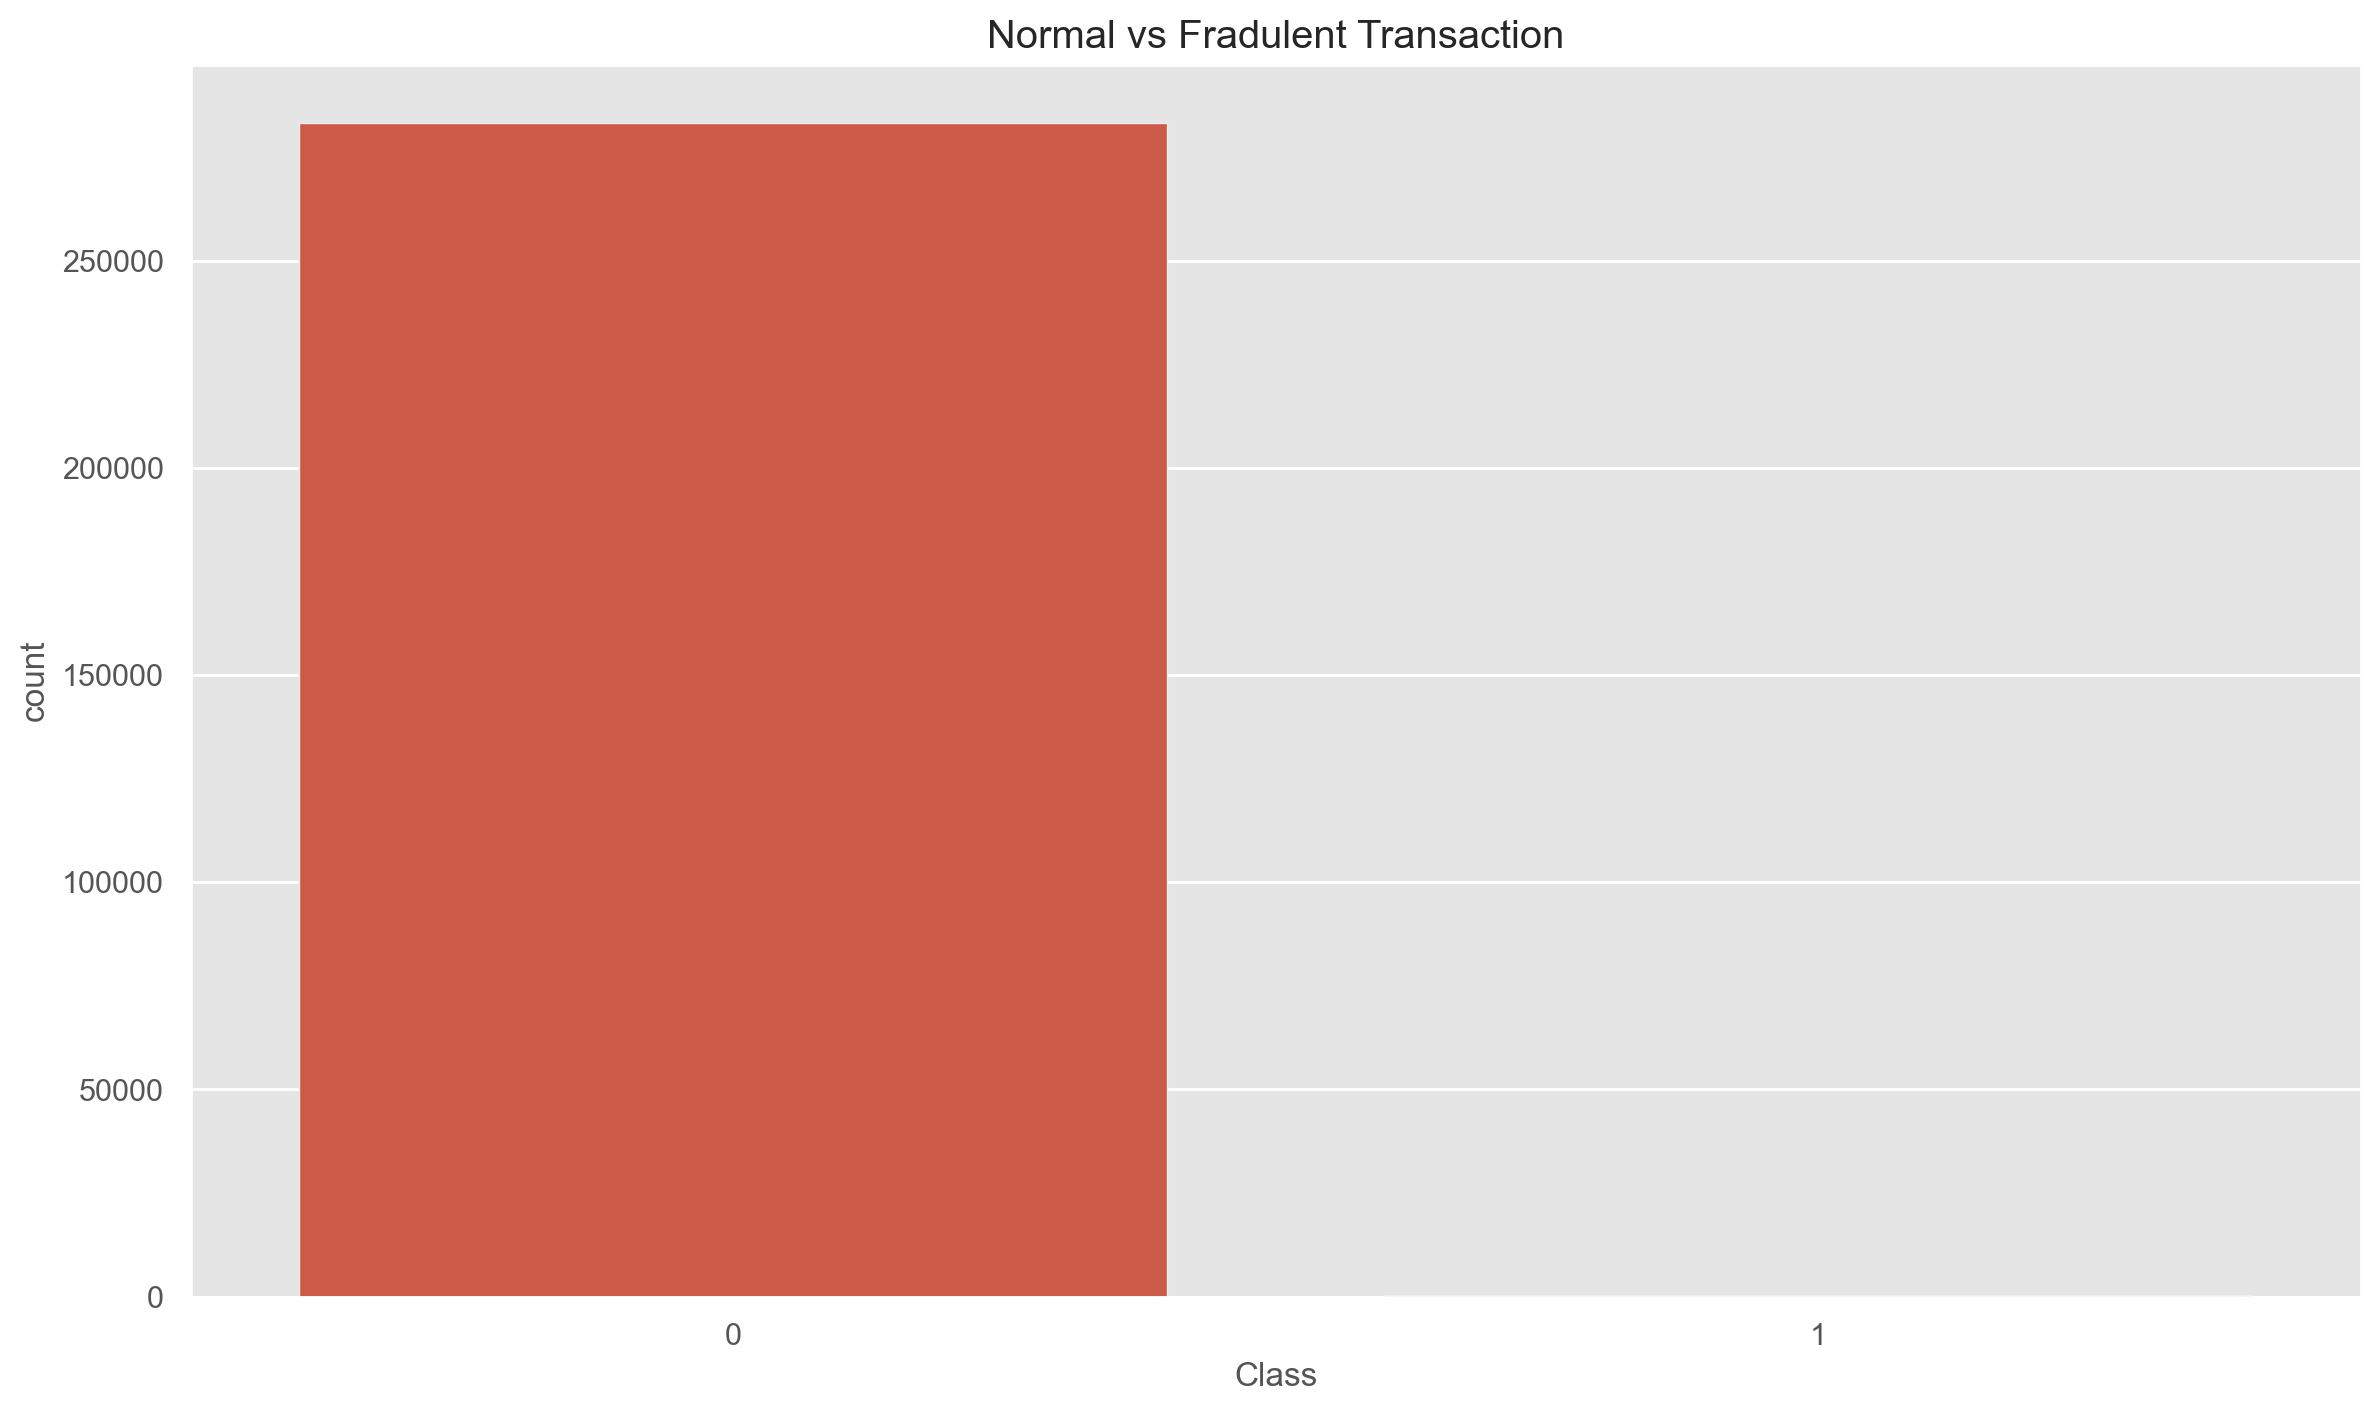

In [16]:
#using graph checking the number of 0 and 1 Transactions
plt.figure(figsize = (14,8), dpi = 200)
sns.countplot(x=credit_card["Class"])
plt.title("Normal vs Fradulent Transaction")
plt.show()

In [17]:
#checking for The Normal And Fradulent transactions
# 0 represents Normal And 1 Represents Fradulent transaction
print(credit_card.Class.value_counts())
print()
print("'0' Represents The Number Of Legit Or Normal Transactions  :",credit_card.Class.value_counts()[0])
print("'1' Represents The Number Of Fradulent Transactions  :",credit_card.Class.value_counts()[1])

Class
0    283253
1       473
Name: count, dtype: int64

'0' Represents The Number Of Legit Or Normal Transactions  : 283253
'1' Represents The Number Of Fradulent Transactions  : 473


##### DATASET IN UNBALANCED

## Separating Dataset For Analysis
- on The Basis  Of Legit and Fradulent Transactions

In [18]:
legit = credit_card[credit_card.Class==0]  #where value of column is 0
fradulent = credit_card[credit_card.Class==1]  #where value of column is 1

In [19]:
legit.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
fradulent.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [21]:
fradulent.Class.value_counts()

Class
1    473
Name: count, dtype: int64

In [22]:
legit.Class.value_counts()

Class
0    283253
Name: count, dtype: int64

### checking the shape of the new datasets

In [23]:
legit.shape

(283253, 31)

In [24]:
fradulent.shape

(473, 31)

In [25]:
#checking again for duplicates  (optional)
legit.duplicated().any()

np.False_

In [26]:
#checking again for duplicates  (optional)
fradulent.duplicated().any()

np.False_

## Checking Some Statistical Values

In [27]:
fradulent.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [28]:
#Checking for legit Amount Column
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
# Checking For Fradulent Amount Column
fradulent.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Comparing the Mean of Both Transactions in Every Column 


In [30]:
credit_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


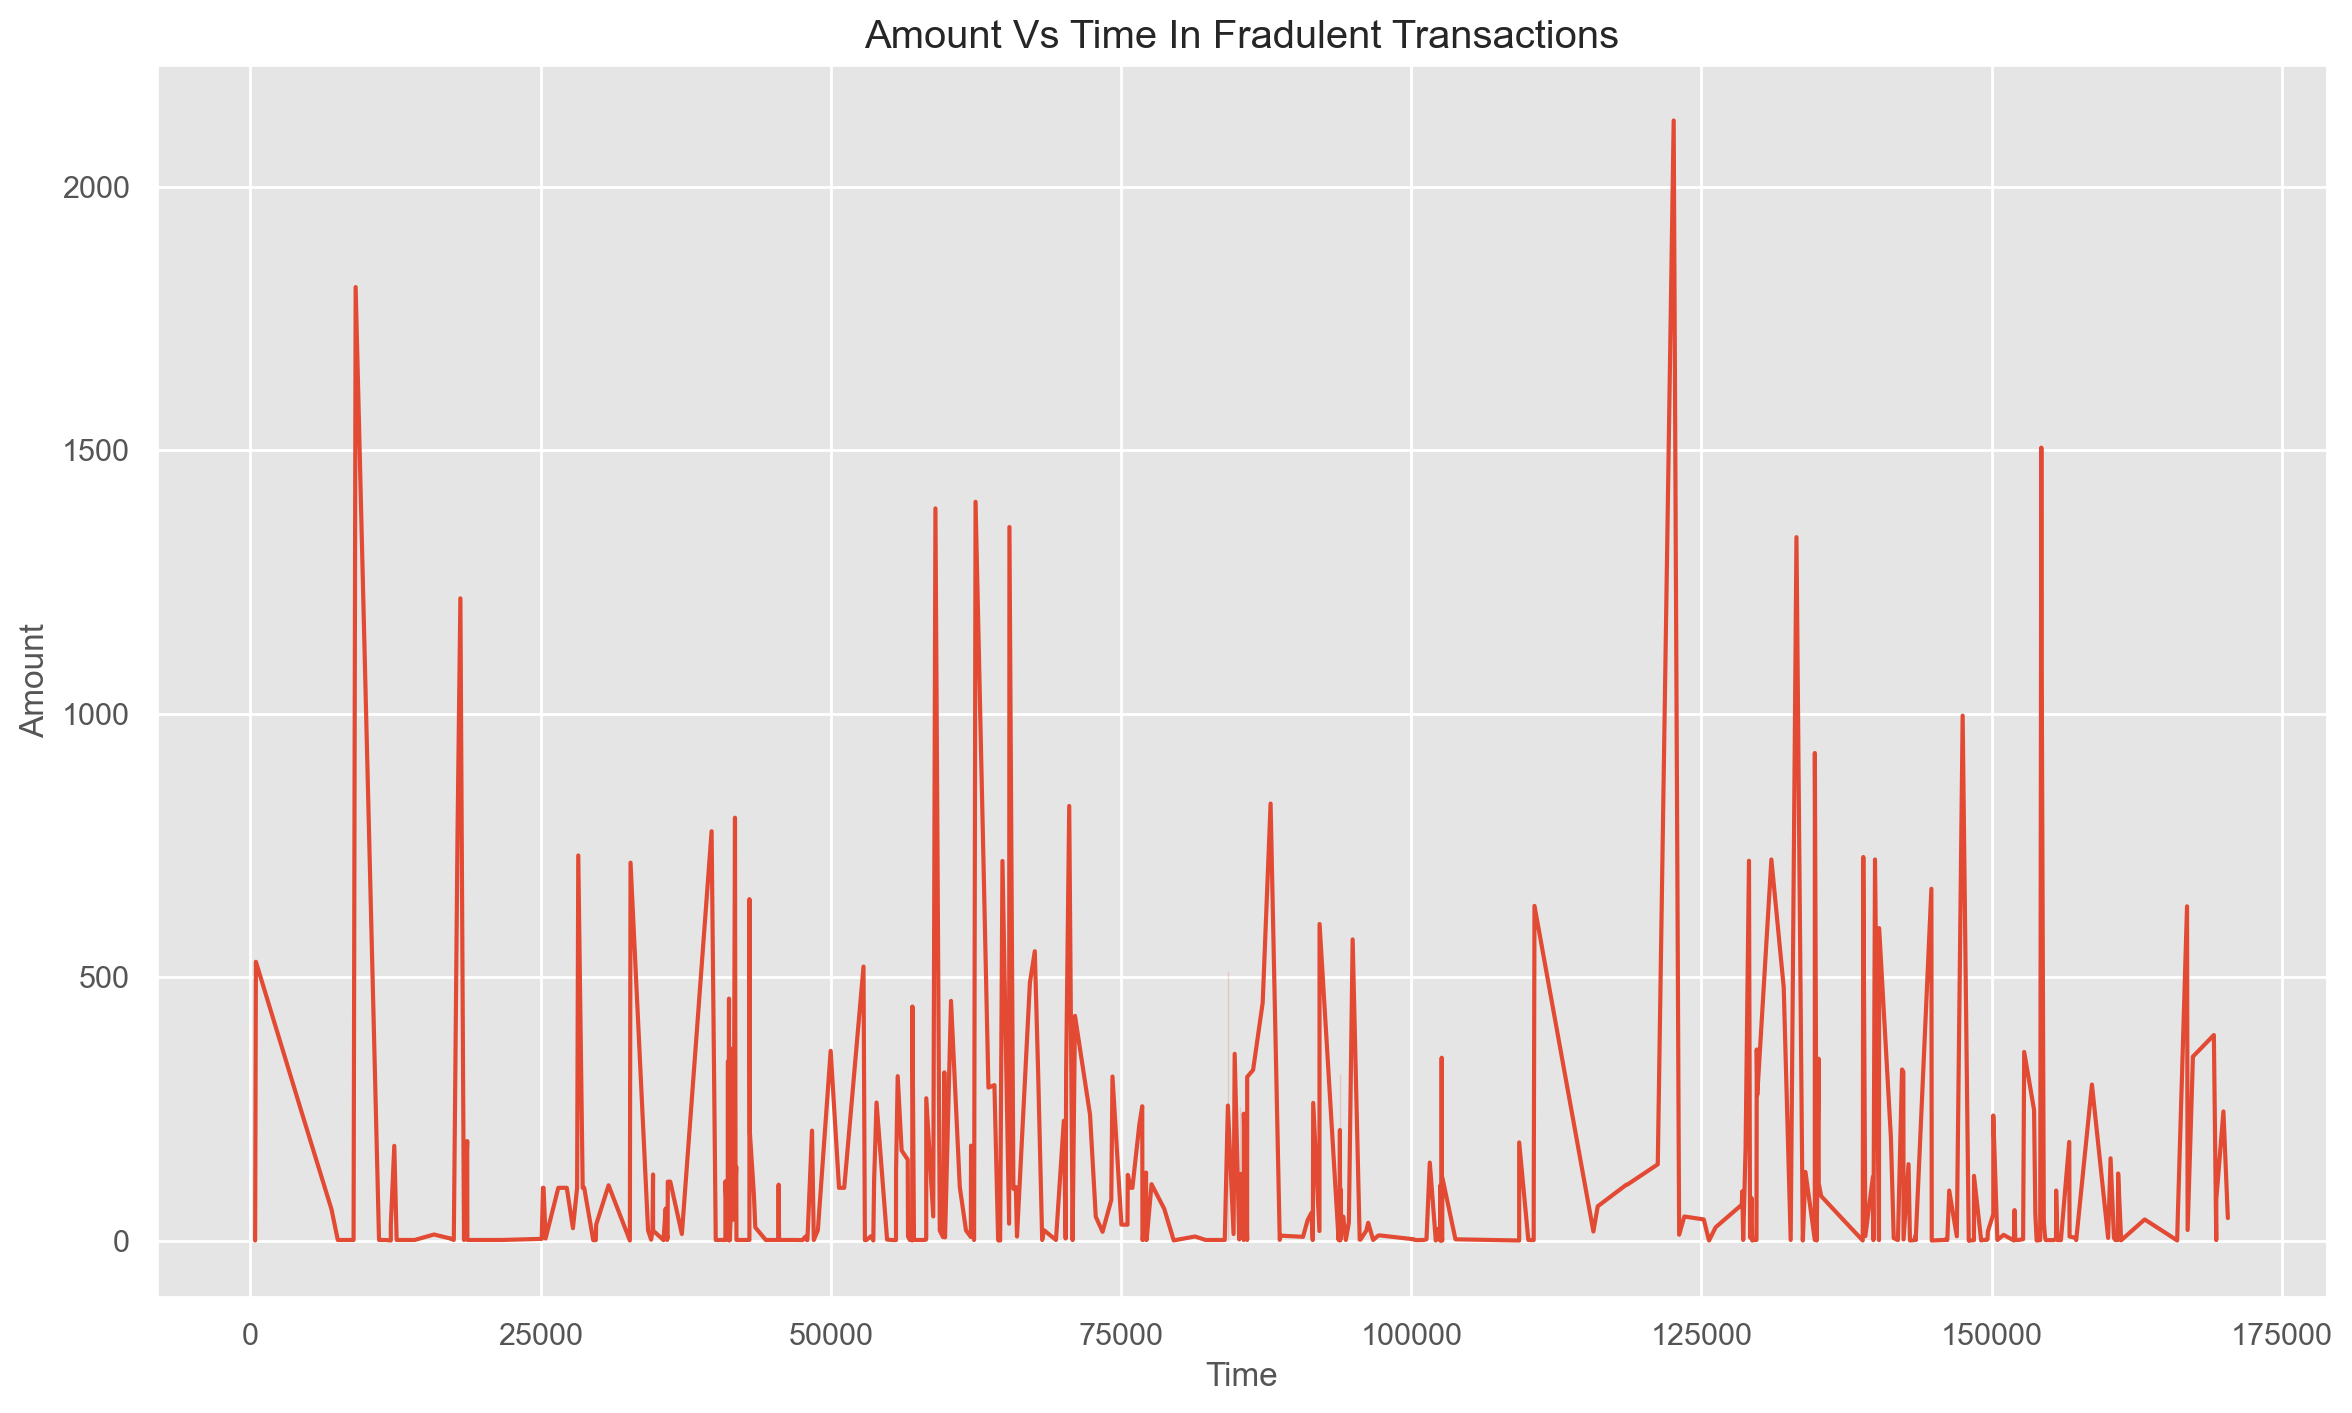

In [32]:
plt.figure(figsize = (14,8), dpi = 200)
sns.lineplot(y=fradulent.Amount,x=fradulent.Time,data=fradulent)
plt.title('Amount Vs Time In Fradulent Transactions')
plt.show()

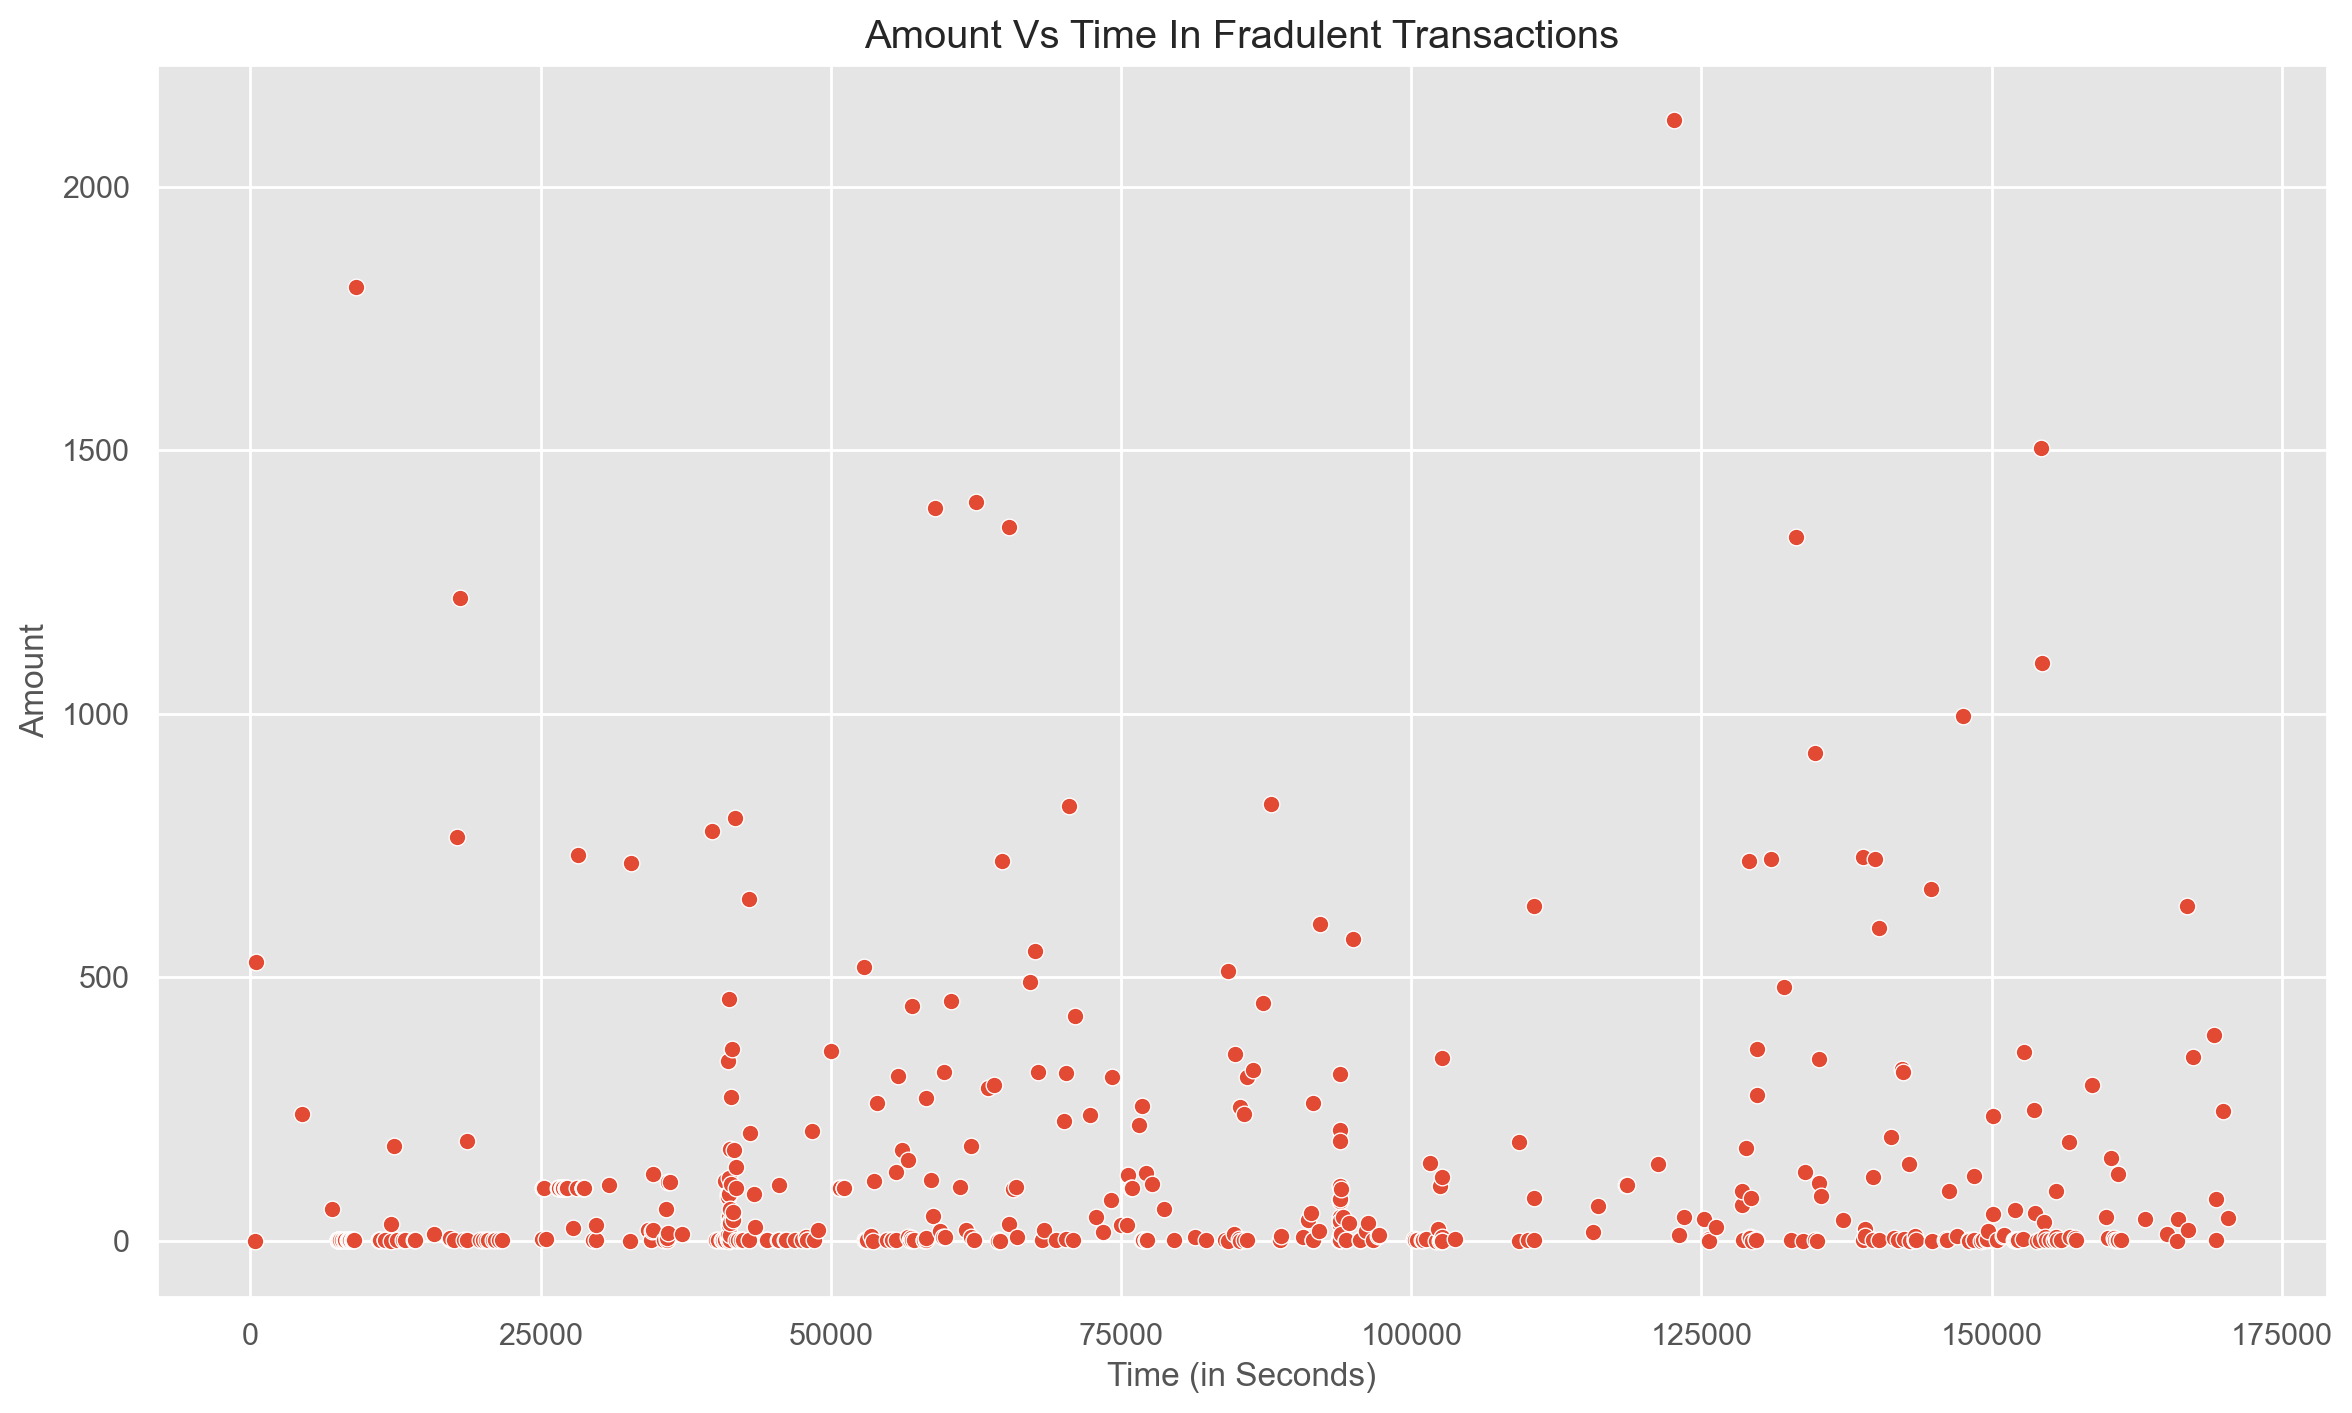

In [33]:
plt.figure(figsize = (14,8), dpi = 200)
sns.scatterplot(y=fradulent.Amount,x=fradulent.Time,data=fradulent)
plt.title('Amount Vs Time In Fradulent Transactions')
plt.xlabel('Time (in Seconds)')

plt.show()

## Performing UnderSampling
- A technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class
- Since the number of fradulent transaction are 473

In [34]:
legit_sample = legit.sample(n=473)  # taking any 473 rows of legit dataframe 

In [35]:
legit_sample.shape

(473, 31)

In [36]:
fradulent.shape

(473, 31)

### Since The Two Dataframes have similar shape,therefore we need to concatenate them
- using the concat function

In [37]:
# concatenate the two dataframes one below the other by mentioning axis = 0
new_data = pd.concat([legit_sample,fradulent],axis = 0)

In [38]:
new_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216892,140678.0,2.238652,-1.291106,-1.452236,-1.531524,-1.073350,-1.435256,-0.530893,-0.424246,-1.623769,...,-0.286140,-0.548815,0.271117,-0.079023,-0.238785,-0.312183,-0.033760,-0.051198,62.60,0
183327,125750.0,1.655905,-0.631300,-0.546039,1.510420,-0.366545,0.190872,-0.173219,0.104889,0.947203,...,-0.415555,-1.241197,0.266513,-0.442934,-0.356974,-1.117200,0.024253,-0.020743,142.00,0
212133,138730.0,2.053620,-0.041669,-1.061279,0.406655,-0.091018,-1.123387,0.186369,-0.322773,0.503708,...,-0.280632,-0.655831,0.344067,-0.006658,-0.305336,0.200259,-0.065992,-0.059983,1.79,0
83305,59782.0,-1.865785,1.027815,1.754966,-3.494520,-0.629559,-0.620416,0.207500,0.317855,2.059899,...,-0.132053,0.016594,-0.354983,-0.009945,0.772436,-0.261427,0.686983,0.345131,1.04,0
58807,48555.0,0.708923,-0.392165,0.733529,2.680129,-0.533501,0.441039,-0.025632,0.202354,-0.334731,...,-0.212023,-1.083009,-0.077403,-0.064100,0.154969,-0.291266,-0.034020,0.052967,219.16,0


In [39]:
new_data.Class.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [40]:
new_data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274382,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,0.00,1
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
275992,166831.0,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,634.30,1
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


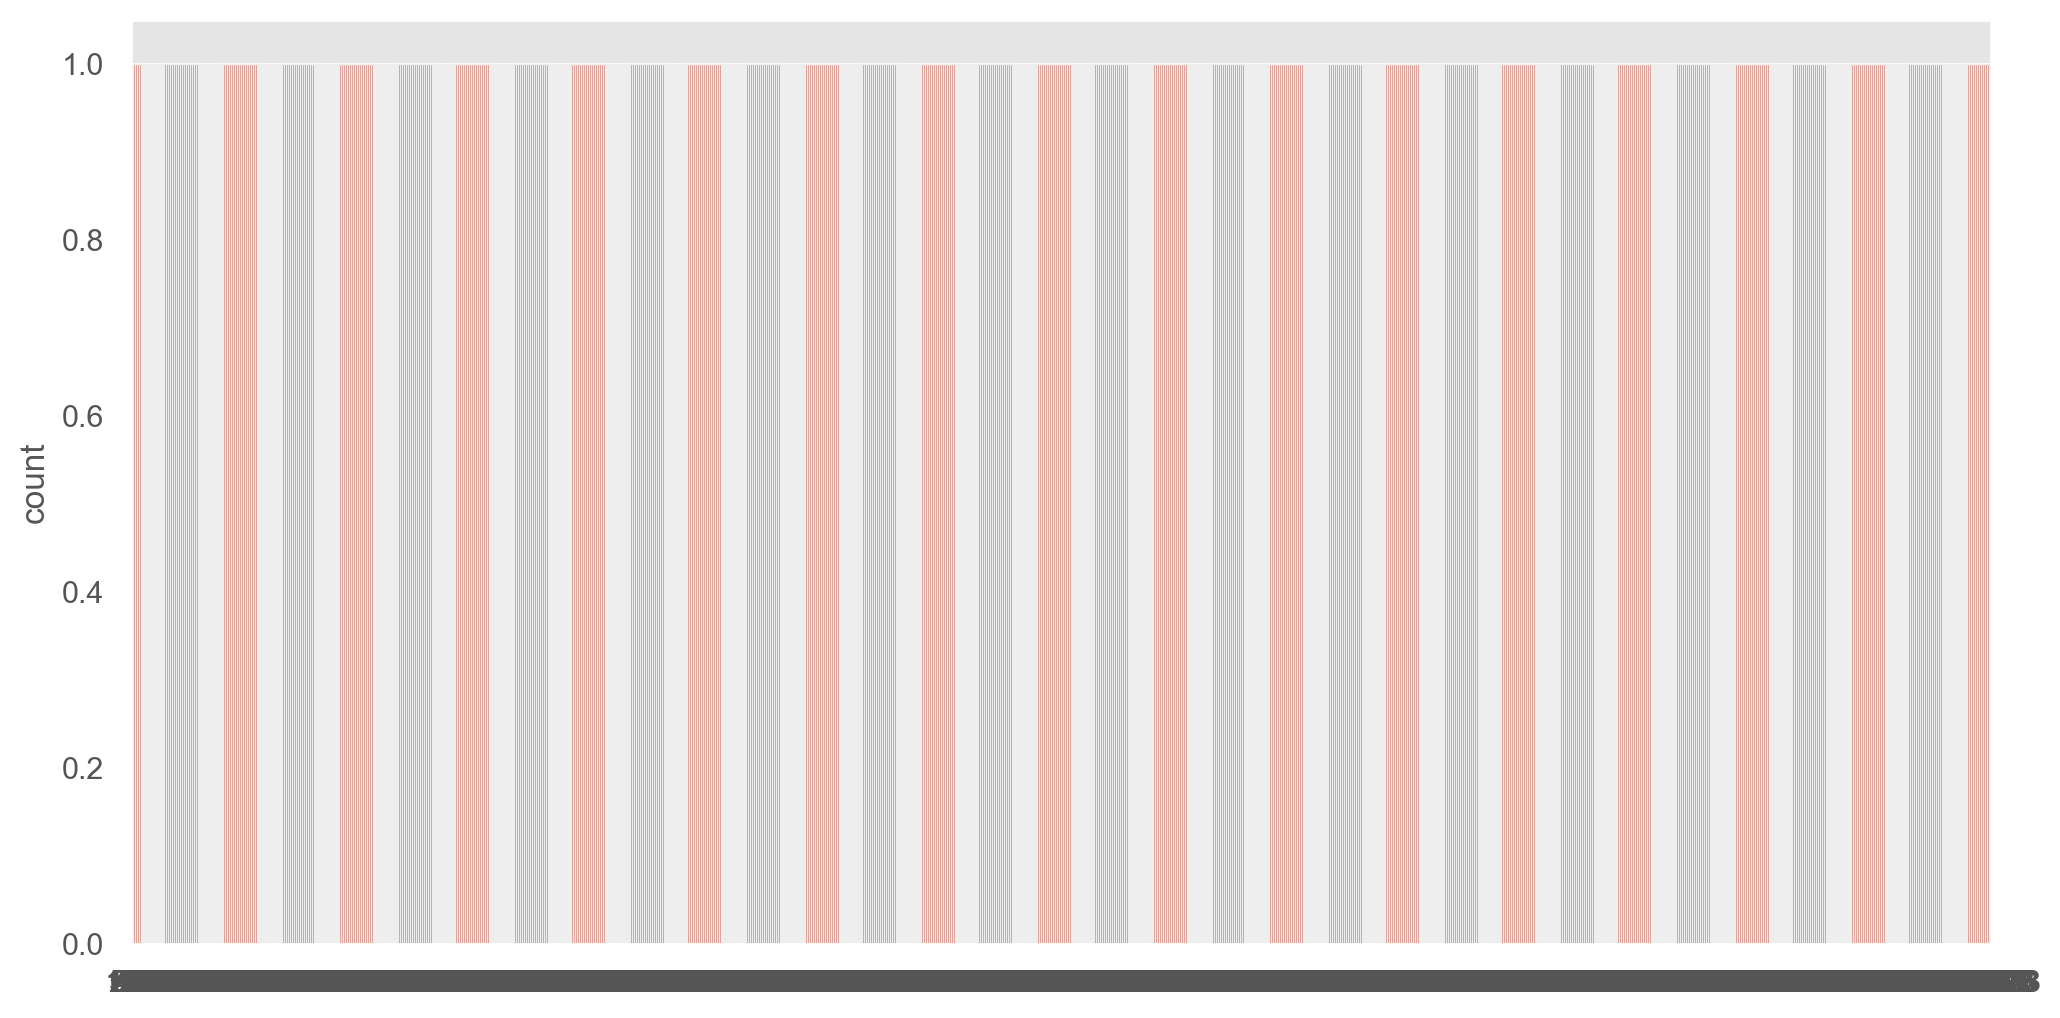

In [41]:
#using graph checking the number of 0 and 1 Transactions
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(new_data.Class)
plt.show()

###  checking mean of new dataset

In [42]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98383.894292,-0.015309,-0.022534,-0.048348,0.028475,0.000214,-0.038424,0.029906,0.061861,0.033802,...,0.002644,-0.031849,-0.014786,0.034366,0.023383,-0.030029,0.018080,0.004578,-0.023401,85.088626
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Splitting The data into Targets And Features

In [43]:
#storing the Class Column in Y variable 
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [44]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
216892,140678.0,2.238652,-1.291106,-1.452236,-1.531524,-1.073350,-1.435256,-0.530893,-0.424246,-1.623769,...,-0.409916,-0.286140,-0.548815,0.271117,-0.079023,-0.238785,-0.312183,-0.033760,-0.051198,62.60
183327,125750.0,1.655905,-0.631300,-0.546039,1.510420,-0.366545,0.190872,-0.173219,0.104889,0.947203,...,-0.007693,-0.415555,-1.241197,0.266513,-0.442934,-0.356974,-1.117200,0.024253,-0.020743,142.00
212133,138730.0,2.053620,-0.041669,-1.061279,0.406655,-0.091018,-1.123387,0.186369,-0.322773,0.503708,...,-0.215333,-0.280632,-0.655831,0.344067,-0.006658,-0.305336,0.200259,-0.065992,-0.059983,1.79
83305,59782.0,-1.865785,1.027815,1.754966,-3.494520,-0.629559,-0.620416,0.207500,0.317855,2.059899,...,0.445843,-0.132053,0.016594,-0.354983,-0.009945,0.772436,-0.261427,0.686983,0.345131,1.04
58807,48555.0,0.708923,-0.392165,0.733529,2.680129,-0.533501,0.441039,-0.025632,0.202354,-0.334731,...,0.231816,-0.212023,-1.083009,-0.077403,-0.064100,0.154969,-0.291266,-0.034020,0.052967,219.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [45]:
Y

216892    0
183327    0
212133    0
83305     0
58807     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64

## Splitting The Data into Training And Testing Data

In [46]:
#taking four variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [47]:
#checking the shape
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


### Now training The Model
- Most Of the time we use Logistic Regression
- It is used for predicting the categorical dependent variable using a given set of independent variables.
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In [48]:
l_model = LogisticRegression()  # loading the instance of Model in l_model variable

## Now Training The Model

In [49]:
l_model.fit(X_train, Y_train)

LogisticRegression()

### Performance Of Model
- Based On Accuracy score


In [50]:
# Training Data accuracy
X_train_prediction = l_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9431216931216931


In [52]:
# Acccuracy on test data
X_test_prediction = l_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [58]:
print('Accuracy on Training data : ', test_data_accuracy)

Accuracy on Training data :  0.9368421052631579


### Model Performance Evaluation Using Confusion Matrix and Classification Report

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on test data
X_test_prediction = l_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, X_test_prediction))


Confusion Matrix:
[[91  4]
 [ 8 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.96      0.92      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



### 
*After calculating accuracy, the model is further evaluated using a confusion matrix and classification report. The confusion matrix summarizes the model’s correct and incorrect predictions for fraudulent and non-fraudulent transactions. The classification report provides key metrics such as precision, recall, and F1-score for each class. In credit card fraud detection, recall for fraudulent transactions is especially important, as missing fraud cases can lead to significant financial loss. This evaluation gives a more reliable understanding of the model’s performance than accuracy alone.

### ROC–AUC Score and ROC Curve Analysis


ROC-AUC Score: 0.9715235457063712


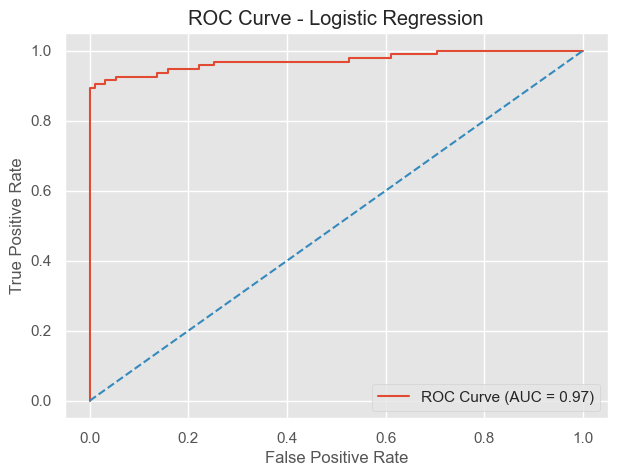

In [60]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
y_prob = l_model.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


### ROC–AUC Score and ROC Curve Analysis
* ROC–AUC is used to understand how well the model can separate fraudulent transactions from normal ones. Instead of relying on a single decision threshold, it evaluates the model’s performance across different probability levels. The ROC curve shows the trade-off between correctly detecting fraud and raising false alarms, while the AUC value summarizes this ability in a single number. A higher AUC means the model is better at identifying fraud transactions. This makes ROC–AUC a more reliable evaluation metric than accuracy, especially for imbalanced datasets like credit card fraud detection.


### Precision–Recall Curve Analysis for Fraud Detection

Average Precision Score: 0.9799146816213379


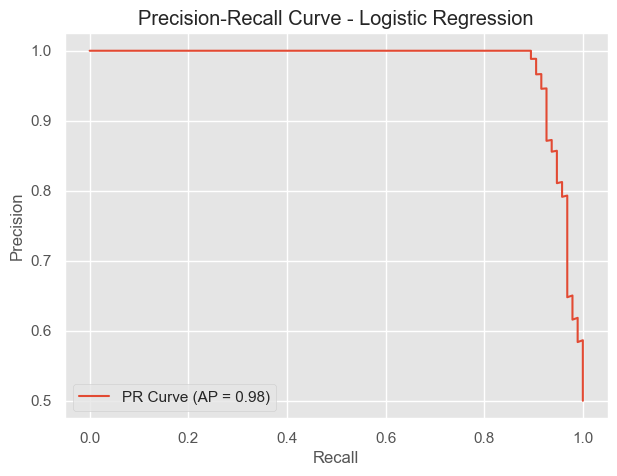

In [64]:

# Precision-Recall values
precision, recall, _ = precision_recall_curve(Y_test, y_prob)

# Average Precision score
avg_precision = average_precision_score(Y_test, y_prob)
print("Average Precision Score:", avg_precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(7,5))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.show()


### Why Precision–Recall Is Needed

* In credit card fraud detection, the dataset is highly imbalanced, where fraudulent transactions form only a very small portion of the data. In such cases, metrics like accuracy or ROC–AUC may give a misleading impression of model performance. Precision–Recall analysis focuses specifically on the minority (fraud) class, making it more suitable for this problem.
### What the Precision–Recall Curve Shows

* Precision measures how many of the transactions predicted as fraud are actually fraudulent.
* Recall measures how many of the total fraudulent transactions are successfully detected by the model.
The Precision–Recall curve illustrates the trade-off between these two metrics at different classification thresholds.

### Average Precision (AP) Score

* The Average Precision score summarizes the Precision–Recall curve into a single value. A higher AP score indicates that the model can identify fraudulent transactions effectively while minimizing false positives. This makes it a reliable metric for evaluating fraud detection models.

### Conclusion and Insights

### 
This project addresses the challenge of credit card fraud detection using Logistic Regression on an imbalanced dataset. Undersampling was applied to improve model learning. Model performance was evaluated using metrics such as confusion matrix, Precision–Recall, and ROC–AUC, which provide better insights than accuracy alone. The results highlight the importance of appropriate evaluation metrics and threshold tuning for effective real-world fraud detection.

### Problem Context
* Credit card fraud detection involves highly imbalanced data, where fraudulent transactions are very rare. This makes fraud detection a challenging classification problem.
### Approach Used
* Logistic Regression was applied as a baseline model, and undersampling was used to balance the dataset so the model could learn patterns from both classes.
### Model Evaluation
* Instead of relying only on accuracy, performance was evaluated using confusion matrix, Precision–Recall, and ROC–AUC metrics to better assess fraud detection capability.
* Key Insight
The analysis shows that proper data balancing and evaluation metrics are crucial for identifying fraudulent transactions effectively in real-world systems.